# **Problem Statement**


1.  Customer segmentation and Developing a recommendation system to suggest top-selling products to customers within each segment



# **Objectives**

1.   Data Cleaning & Transformation
2.   Feature Engineering : Develop new features based on the transactional data to create a customer-centric dataset

1.   Data Preprocessing
2.   Customer Segmentation using K-Means Clustering

1.   Cluster Analysis
2.   Recommendation System








# **Dataset**

1.   The Dataset obtained from UCL Machine Learning
2.  It covers all  transactions between the period 2010 ,2011.





# **Tools and Technologies**

1. NumPy
1. Pandas
1. Seaborn  
1. Matplotlib







# **Algorithms**

1.   Isolation Forest
2.   StandardScaler
3.   Principal Component Analysis
4.   K-means
5.   Linear Regression
  



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import linregress
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('Path to your dataset ')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe() #summary statistics

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Preprocessing

In [ ]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()


5225

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(401604, 8)

In [ ]:
# invoice number with a "C" prefix or indicator, it likely signifies that the invoice is related to a credit transaction or cancelled transaction
def has_letters(invoice_no):
    return any(char.isalpha() for char in invoice_no)

# Filter for invoices with letters
df_with_letters = df[df['InvoiceNo'].apply(has_letters)]


df_with_letters

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
df_with_letters.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [ ]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')



In [ ]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
198349,554033,85099B,JUMBO BAG RED RETROSPOT,20,5/20/2011 14:06,2.08,16187.0,United Kingdom,Completed
208378,555110,20719,WOODLAND CHARLOTTE BAG,1,5/31/2011 14:34,0.85,17841.0,United Kingdom,Completed
170216,551283,22882,NUMBER TILE VINTAGE FONT 3,1,4/27/2011 14:01,1.95,16755.0,United Kingdom,Completed


In [ ]:
df.shape

(401604, 9)

In [ ]:
df['Transaction_Status'].value_counts()

Transaction_Status
Completed    392732
Cancelled      8872
Name: count, dtype: int64

In [ ]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
completed_transactions = df[df['Transaction_Status'] == 'Completed']

In [ ]:
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [ ]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100
cancelled_percentage

2.209141343213713

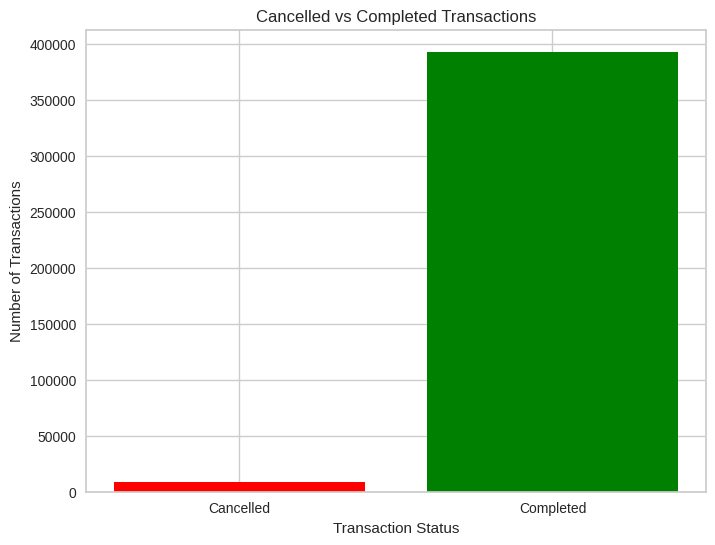

In [ ]:
status_labels = ['Cancelled', 'Completed']
status_counts = [cancelled_transactions.shape[0], completed_transactions.shape[0]]

plt.figure(figsize=(8, 6))
plt.bar(status_labels, status_counts, color=['red', 'green'])
plt.xlabel('Transaction Status')
plt.ylabel('Number of Transactions')
plt.title('Cancelled vs Completed Transactions')
plt.show()

In [ ]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()
unique_stock_codes


3684

In [ ]:
# Finding the top 10 most frequent stock codes
top_10_stocks = df['StockCode'].value_counts(normalize=True).head(10) * 100
top_10_stocks

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64

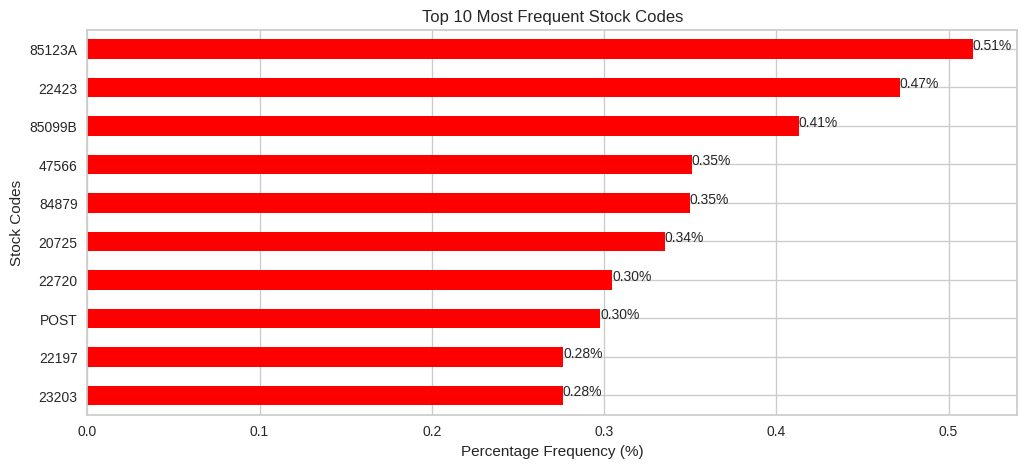

In [ ]:
# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stocks.plot(kind='barh', color='red')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stocks):
    plt.text(value, index, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Detect Anomiliew is stockcode
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
unique_stock_codes



array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [ ]:
type(unique_stock_codes)

numpy.ndarray

In [ ]:
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()
numeric_char_counts_in_unique_codes

5    3676
0       7
1       1
Name: count, dtype: int64

In [ ]:
anomalous_stock_codes = numeric_char_counts_in_unique_codes.index[numeric_char_counts_in_unique_codes < 2]

In [ ]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [ ]:

df.shape

(401604, 9)

In [ ]:
df['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,40.000000
mean,347.100000
std,1978.311813
min,1.000000
25%,1.000000
50%,4.500000
75%,24.000000
max,12540.000000


In [ ]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the dataframe
df.shape

(392692, 9)

In [ ]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
392687    12/9/2011 12:50
392688    12/9/2011 12:50
392689    12/9/2011 12:50
392690    12/9/2011 12:50
392691    12/9/2011 12:50
Name: InvoiceDate, Length: 392692, dtype: object

In [ ]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date

In [ ]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7676
14911.0    5670
14096.0    5111
12748.0    4412
14606.0    2677
           ... 
16765.0       1
13302.0       1
13270.0       1
16148.0       1
17846.0       1
Name: count, Length: 4338, dtype: int64

In [ ]:
# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

In [ ]:
customer_data

,CustomerID,InvoiceDay
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4333,18280.0,2011-03-07
4334,18281.0,2011-06-12
4335,18282.0,2011-12-02
4336,18283.0,2011-12-06


In [ ]:
# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

In [ ]:
most_recent_date

datetime.date(2011, 12, 9)

In [ ]:
# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [ ]:
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

In [ ]:
total_transactions

,CustomerID,Total_Transactions
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [ ]:
# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)
total_products_purchased

,CustomerID,Total_Products_Purchased
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197
...,...,...
4333,18280.0,45
4334,18281.0,54
4335,18282.0,103
4336,18283.0,1357


In [ ]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')


In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,1,74215
1,12347.0,2,7,2458
2,12348.0,75,4,2341
3,12349.0,18,1,631
4,12350.0,310,1,197


In [ ]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

In [ ]:
total_spend

,CustomerID,Total_Spend
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [ ]:
# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

In [ ]:
average_transaction_value

,CustomerID,Total_Spend,Total_Transactions,Average_Transaction_Value
0,12346.0,77183.60,1,77183.600000
1,12347.0,4310.00,7,615.714286
2,12348.0,1797.24,4,449.310000
3,12349.0,1757.55,1,1757.550000
4,12350.0,334.40,1,334.400000
...,...,...,...,...
4333,18280.0,180.60,1,180.600000
4334,18281.0,80.82,1,80.820000
4335,18282.0,178.05,2,89.025000
4336,18283.0,2045.53,16,127.845625


In [ ]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,1,74215,77183.60,77183.600000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2341,1797.24,449.310000
3,12349.0,18,1,631,1757.55,1757.550000
4,12350.0,310,1,197,334.40,334.400000


In [ ]:
customer_data.shape

(4338, 6)

In [ ]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

In [ ]:
unique_products_purchased

,CustomerID,Unique_Products_Purchased
0,12346.0,1
1,12347.0,103
2,12348.0,22
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,263


In [ ]:
# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,1,74215,77183.60,77183.600000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2341,1797.24,449.310000,22
3,12349.0,18,1,631,1757.55,1757.550000,73
4,12350.0,310,1,197,334.40,334.400000,17


In [ ]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,InvoiceDay,Total_Spend,Day_Of_Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,2010-12-01,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,2010-12-01,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,2010-12-01,20.34,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Completed,2011-12-09,10.20,4,12
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Completed,2011-12-09,12.60,4,12
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Completed,2011-12-09,16.60,4,12


In [ ]:
# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

In [ ]:
average_days_between_purchases

,CustomerID,Average_Days_Between_Purchases
0,12347.0,2.016575
1,12348.0,9.433333
2,12349.0,0.000000
3,12350.0,0.000000
4,12352.0,3.095238
...,...,...
4262,18280.0,0.000000
4263,18281.0,0.000000
4264,18282.0,10.818182
4265,18283.0,0.463889


In [ ]:
df.groupby(['CustomerID', 'Day_Of_Week']).size()

CustomerID  Day_Of_Week
12346.0     1                1
12347.0     0               47
            1               53
            2               40
            3               42
                          ... 
18283.0     3              338
            6               44
18287.0     2               38
            4                3
            6               29
Length: 9863, dtype: int64

In [ ]:
# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')



In [ ]:
favorite_shopping_day

,CustomerID,Day_Of_Week,Count
0,12346.0,1,1
1,12347.0,0,47
2,12347.0,1,53
3,12347.0,2,40
4,12347.0,3,42
...,...,...,...
9858,18283.0,3,338
9859,18283.0,6,44
9860,18287.0,2,38
9861,18287.0,4,3


In [ ]:
#find the index of the row with the maximum value in the 'Count' column
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

In [ ]:
favorite_shopping_day

,CustomerID,Day_Of_Week
0,12346.0,1
2,12347.0,1
6,12348.0,3
8,12349.0,0
9,12350.0,2
...,...,...
9852,18280.0,0
9853,18281.0,6
9854,18282.0,4
9858,18283.0,3


In [ ]:
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour

,CustomerID,Hour,Count
0,12346.0,10,1
1,12347.0,8,22
2,12347.0,10,24
3,12347.0,12,47
4,12347.0,13,18
...,...,...,...
11200,18283.0,15,1
11201,18283.0,16,55
11202,18283.0,19,76
11203,18287.0,9,3


In [ ]:
# Find the favorite shopping hour of the day

favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]


In [ ]:
favorite_shopping_hour

,CustomerID,Hour
0,12346.0,10
5,12347.0,14
9,12348.0,19
10,12349.0,9
11,12350.0,16
...,...,...
11191,18280.0,9
11192,18281.0,10
11194,18282.0,13
11199,18283.0,14


In [ ]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14


In [ ]:
df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [ ]:
df.groupby(['CustomerID', 'Country']).size()

CustomerID  Country       
12346.0     United Kingdom      1
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
                             ... 
18280.0     United Kingdom     10
18281.0     United Kingdom      7
18282.0     United Kingdom     12
18283.0     United Kingdom    721
18287.0     United Kingdom     70
Length: 4346, dtype: int64

In [ ]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')


In [ ]:
customer_country

,CustomerID,Country,Number_of_Transactions
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17
...,...,...,...
4341,18280.0,United Kingdom,10
4342,18281.0,United Kingdom,7
4343,18282.0,United Kingdom,12
4344,18283.0,United Kingdom,721


In [ ]:
# Get the country with the maximum number of transactions for each customer
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

In [ ]:
customer_main_country

,CustomerID,Country,Number_of_Transactions
4018,17841.0,United Kingdom,7676
1887,14911.0,EIRE,5670
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4412
1669,14606.0,United Kingdom,2677
...,...,...,...
605,13135.0,United Kingdom,1
3958,17747.0,United Kingdom,1
4196,18084.0,United Kingdom,1
3961,17752.0,United Kingdom,1


In [ ]:
# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0


In [ ]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3850
0     417
Name: count, dtype: int64

In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [ ]:
total_transactions

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [ ]:
# Calculate the number of cancelled transactions for each customer
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

In [ ]:
cancellation_frequency

,CustomerID,Cancellation_Frequency
0,12346.0,1
1,12352.0,3
2,12359.0,2
3,12362.0,3
4,12365.0,1
...,...,...
1584,18272.0,1
1585,18274.0,1
1586,18276.0,2
1587,18277.0,1


In [ ]:
cancellation_frequency.isna().sum()

CustomerID                0
Cancellation_Frequency    0
dtype: int64

In [ ]:
# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')


In [ ]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,NaN
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,NaN
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,NaN
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,NaN
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4262,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,9,1,NaN
4263,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,10,1,NaN
4264,18282.0,7,2,103,178.05,89.025000,12,10.818182,4,13,1,1.0
4265,18283.0,3,16,1357,2045.53,127.845625,263,0.463889,3,14,1,NaN


In [ ]:
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

In [ ]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4262,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0.0
4263,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0.0
4264,18282.0,7,2,103,178.05,89.025000,12,10.818182,4,13,1,1.0
4265,18283.0,3,16,1357,2045.53,127.845625,263,0.463889,3,14,1,0.0


In [ ]:
# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0,0.0
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0,0.0
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0,0.0
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0,3.0,3.0


In [ ]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

In [ ]:
monthly_spending

,CustomerID,Year,Month,Total_Spend
0,12346.0,2011,1,77183.60
1,12347.0,2010,12,711.79
2,12347.0,2011,1,475.39
3,12347.0,2011,4,636.25
4,12347.0,2011,6,382.52
...,...,...,...,...
13049,18283.0,2011,10,112.99
13050,18283.0,2011,11,637.71
13051,18283.0,2011,12,208.00
13052,18287.0,2011,5,765.28


In [ ]:
# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

In [ ]:
seasonal_buying_patterns

,CustomerID,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,77183.600000,NaN
1,12347.0,615.714286,341.070789
2,12348.0,449.310000,301.159918
3,12349.0,1757.550000,NaN
4,12350.0,334.400000,NaN
...,...,...,...
4333,18280.0,180.600000,NaN
4334,18281.0,80.820000,NaN
4335,18282.0,89.025000,15.817979
4336,18283.0,204.553000,165.490044


In [ ]:
# Replace NaN values customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

In [ ]:
seasonal_buying_patterns

,CustomerID,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,77183.600000,0.000000
1,12347.0,615.714286,341.070789
2,12348.0,449.310000,301.159918
3,12349.0,1757.550000,0.000000
4,12350.0,334.400000,0.000000
...,...,...,...
4333,18280.0,180.600000,0.000000
4334,18281.0,80.820000,0.000000
4335,18282.0,89.025000,15.817979
4336,18283.0,204.553000,165.490044


In [ ]:
# from sklearn.linear_model import LinearRegression

In [ ]:
# def calculate_trend(spend_data):

#     if len(spend_data) > 1:
#         x = np.arange(len(spend_data)).reshape(-1, 1)
#         model = LinearRegression()
#         model.fit(x, spend_data)
#         slope = model.coef_[0]
#         return slope

#     else:
#         return 0

In [ ]:
# spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
# spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

In [ ]:
# spending_trends

In [ ]:
# Calculate Trends in Spending

def calculate_trend(spend_data):

    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope

    else:
        return 0

In [ ]:

spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

In [ ]:
spending_trends

,CustomerID,Spending_Trend
0,12346.0,0.000000
1,12347.0,4.486071
2,12348.0,-160.884000
3,12349.0,0.000000
4,12350.0,0.000000
...,...,...
4333,18280.0,0.000000
4334,18281.0,0.000000
4335,18282.0,-22.370000
4336,18283.0,22.332909


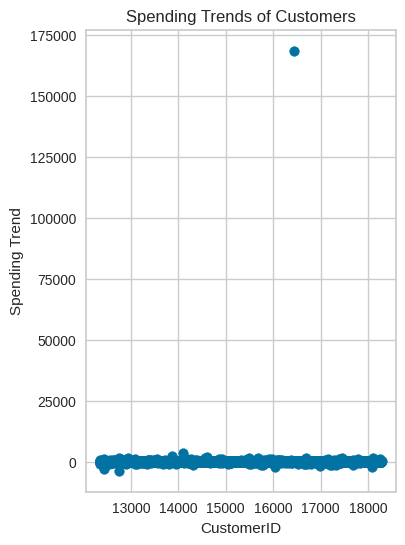

In [ ]:
plt.figure(figsize=(4,6))
plt.scatter(spending_trends['CustomerID'], spending_trends['Spending_Trend'])
plt.xlabel('CustomerID')
plt.ylabel('Spending Trend')
plt.title('Spending Trends of Customers')
plt.grid(True)
plt.show()

In [ ]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,0.0,0.0,449.310000,301.159918,-160.884000
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,0.0,0.0,1757.550000,0.000000,0.000000
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,0.0,0.0,334.400000,0.000000,0.000000
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0,3.0,3.0,626.510000,453.171921,-58.712000


In [ ]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,0,0.0,449.31,301.159918,-160.884
2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,0,0.0,1757.55,0.0,0.0
3,12350.0,310,1,197,334.4,334.4,17,0.0,2,16,0,0,0.0,334.4,0.0,0.0
4,12352.0,36,8,536,2506.04,313.255,59,3.095238,1,14,0,3,3.0,626.51,453.171921,-58.712


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4267 non-null   string 
 1   Days_Since_Last_Purchase        4267 non-null   Int64  
 2   Total_Transactions              4267 non-null   Int64  
 3   Total_Products_Purchased        4267 non-null   Int64  
 4   Total_Spend                     4267 non-null   Float64
 5   Average_Transaction_Value       4267 non-null   Float64
 6   Unique_Products_Purchased       4267 non-null   Int64  
 7   Average_Days_Between_Purchases  4267 non-null   Float64
 8   Day_Of_Week                     4267 non-null   Int32  
 9   Hour                            4267 non-null   Int32  
 10  Is_UK                           4267 non-null   Int64  
 11  Cancellation_Frequency          4267 non-null   Int64  
 12  Cancellation_Rate               42

In [ ]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,0,0.0,449.31,301.159918,-160.884
2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,0,0.0,1757.55,0.0,0.0
3,12350.0,310,1,197,334.4,334.4,17,0.0,2,16,0,0,0.0,334.4,0.0,0.0
4,12352.0,36,8,536,2506.04,313.255,59,3.095238,1,14,0,3,3.0,626.51,453.171921,-58.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,18280.0,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4263,18281.0,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4264,18282.0,7,2,103,178.05,89.025,12,10.818182,4,13,1,1,0.333333,89.025,15.817979,-22.37
4265,18283.0,3,16,1357,2045.53,127.845625,263,0.463889,3,14,1,0,0.0,204.553,165.490044,22.332909


In [ ]:
customer_data.columns

Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
       'Spending_Trend'],
      dtype='object')

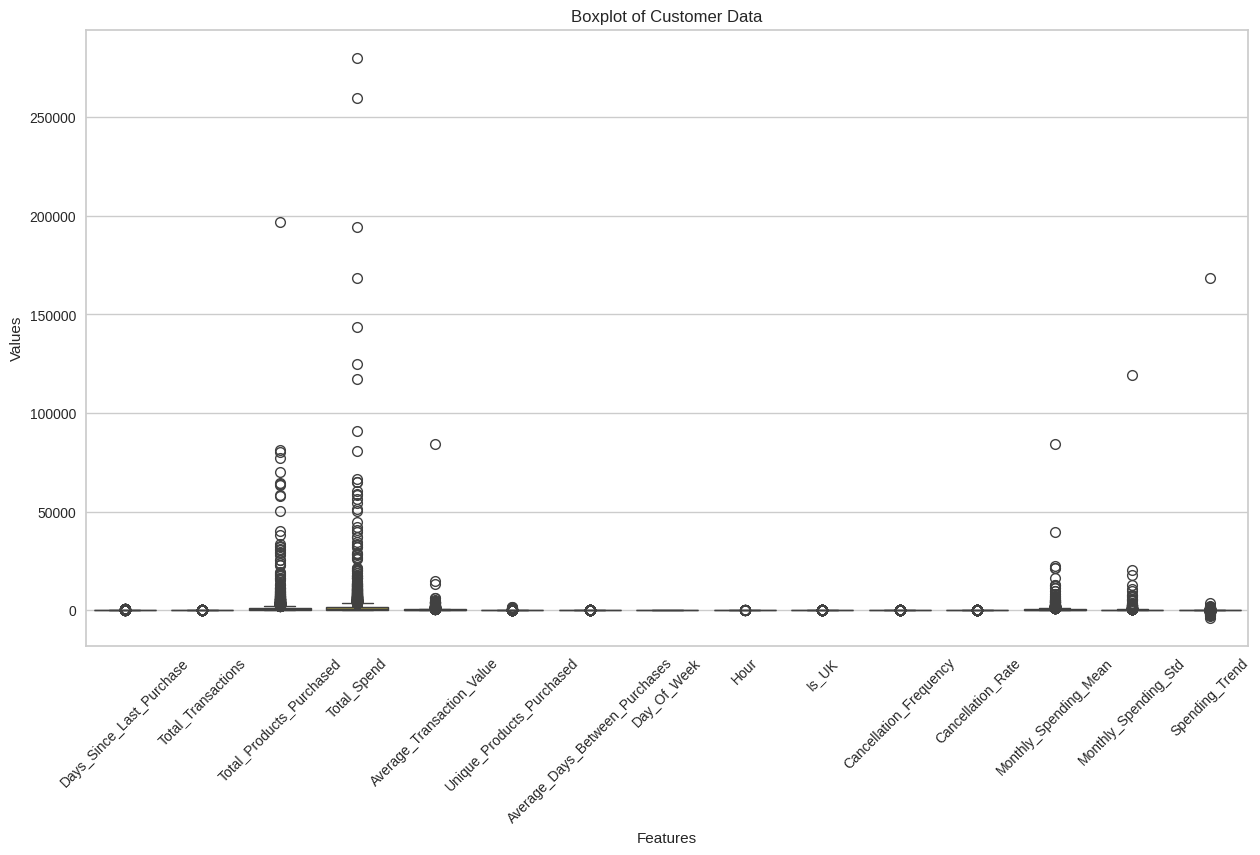

In [ ]:
# Define the columns to plot
columns_to_plot = ['CustomerID','Days_Since_Last_Purchase', 'Total_Transactions',
                   'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
                   'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
                   'Day_Of_Week', 'Hour', 'Is_UK', 'Cancellation_Frequency',
                   'Cancellation_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
                   'Spending_Trend']

# Create boxplot using seaborn
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_data[columns_to_plot])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Customer Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


In [ ]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,0,0.0,449.31,301.159918,-160.884,1,0
2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,0,0.0,1757.55,0.0,0.0,1,0
3,12350.0,310,1,197,334.4,334.4,17,0.0,2,16,0,0,0.0,334.4,0.0,0.0,1,0
4,12352.0,36,8,536,2506.04,313.255,59,3.095238,1,14,0,3,3.0,626.51,453.171921,-58.712,1,0


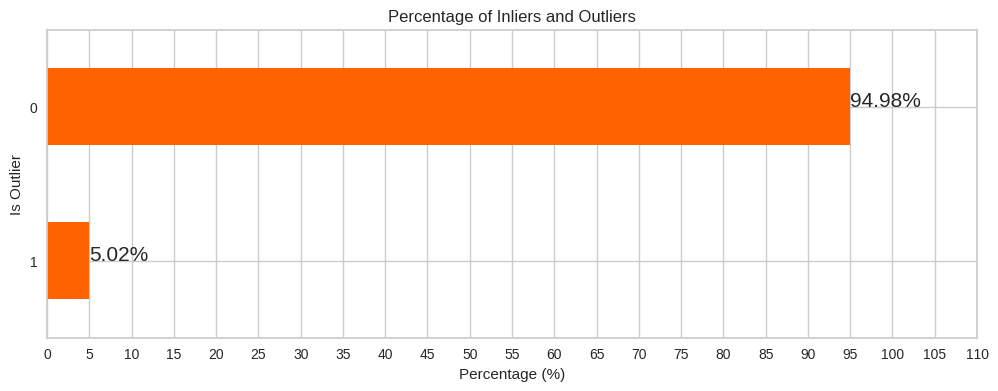

In [ ]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

In [ ]:
# Remove the outliers from the main dataset
customer_data = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data = customer_data.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data.reset_index(drop=True, inplace=True)

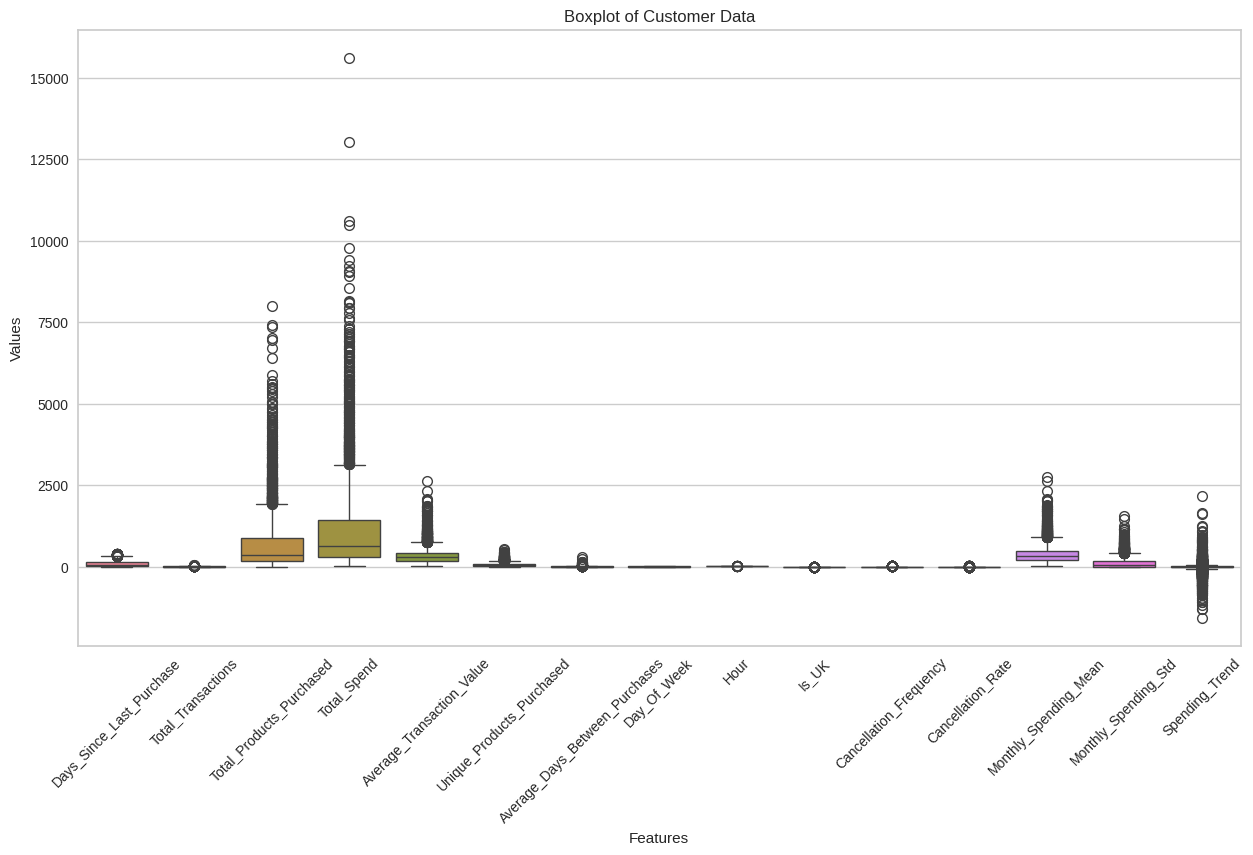

In [ ]:
# Create boxplot using seaborn
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_data[columns_to_plot])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Customer Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week','InvoiceDay']

columns_to_scale = customer_data.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data.copy()

customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,-0.916953,0.985939,2.084423,2.331351,1.160988,0.793004,-0.119570,1,0.640791,0,-0.528259,-0.430492,0.830244,1.435855,0.056170
1,12348.0,-0.179097,0.147556,1.947311,0.482689,0.478127,-0.555519,0.630612,3,2.803261,0,-0.528259,-0.430492,0.238267,1.187797,-0.930713
2,12349.0,-0.755231,-0.690826,-0.056626,0.453488,5.846659,0.293551,-0.323540,0,-1.521679,0,-0.528259,-0.430492,4.892277,-0.684000,0.029398
3,12350.0,2.196194,-0.690826,-0.565228,-0.593537,0.006578,-0.638761,-0.323540,2,1.505779,0,-0.528259,-0.430492,-0.170520,-0.684000,0.029398
4,12352.0,-0.573294,1.265400,-0.167956,1.004160,-0.080193,0.060473,-0.010466,1,0.640791,0,2.097704,3.655631,0.868649,2.132596,-0.320979


In [ ]:
customer_data_scaled.set_index('CustomerID', inplace=True)

In [ ]:
# Apply PCA
pca = PCA().fit(customer_data_scaled)

In [ ]:
# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [ ]:
explained_variance_ratio

array([0.28493638, 0.21024439, 0.1087452 , 0.07369957, 0.06705072,
       0.06062661, 0.05468438, 0.04419945, 0.03084781, 0.02684924,
       0.01340214, 0.012057  , 0.00471959, 0.00436329, 0.00357422])

In [ ]:
cumulative_explained_variance

array([0.28493638, 0.49518078, 0.60392598, 0.67762555, 0.74467627,
       0.80530288, 0.85998726, 0.90418671, 0.93503452, 0.96188376,
       0.9752859 , 0.9873429 , 0.99206249, 0.99642578, 1.        ])

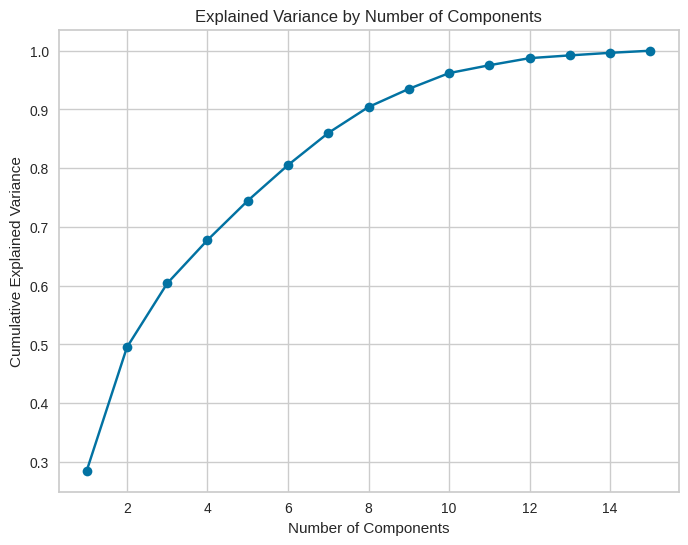

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

In [ ]:
desired_variance_explained = 0.80

# Find the smallest k where the cumulative explained variance exceeds the threshold
optimal_k = np.argmax(cumulative_explained_variance >= desired_variance_explained) + 1
print("Optimal k to retain", desired_variance_explained, "of the variance:", optimal_k)


Optimal k to retain 0.8 of the variance: 6


In [ ]:
# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

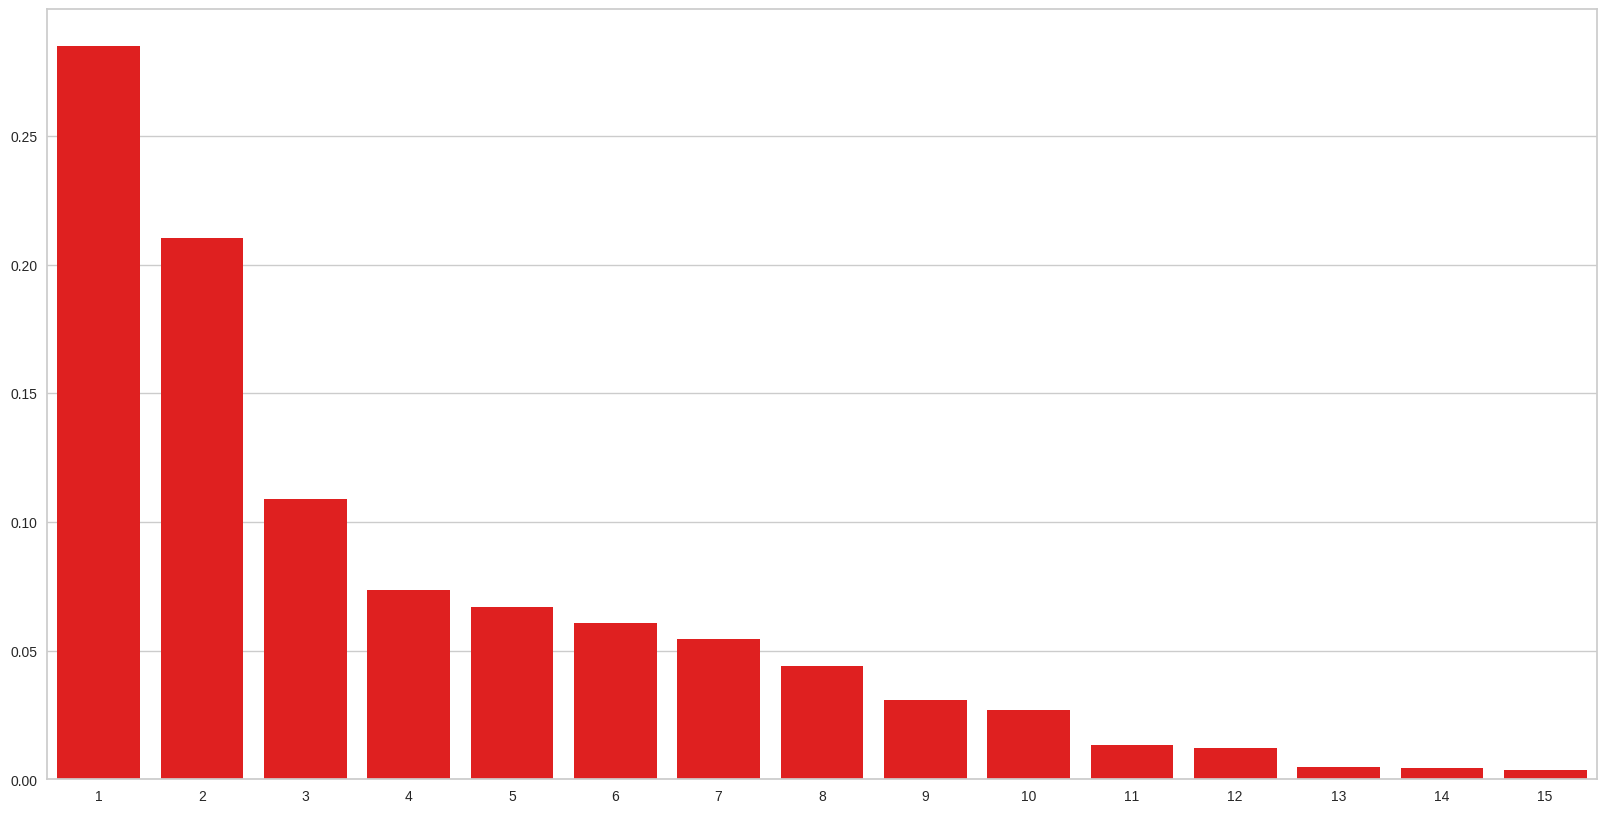

In [ ]:
# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),y=explained_variance_ratio,color='red',)

In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

customer_data_pca = pca.fit_transform(customer_data_scaled)

column_names = []

for i in range(pca.n_components_):

    column_names.append('PC' + str(i + 1))


customer_data_pca = pd.DataFrame(customer_data_pca, columns=column_names)


customer_data_pca.index = customer_data_scaled.index

In [ ]:

customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12347.0,3.417742,-1.347816,1.134397,1.708350,-0.570142,-0.038815
12348.0,1.130880,0.591307,0.660540,1.246546,-1.148740,-0.750812
12349.0,2.548642,-2.851382,6.453147,-1.320732,1.335417,0.031448
12350.0,-1.913125,-0.590857,0.763310,-0.760160,-1.298112,0.099241
12352.0,3.377813,-1.536748,-1.797159,-2.259588,-0.123092,-0.290063


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

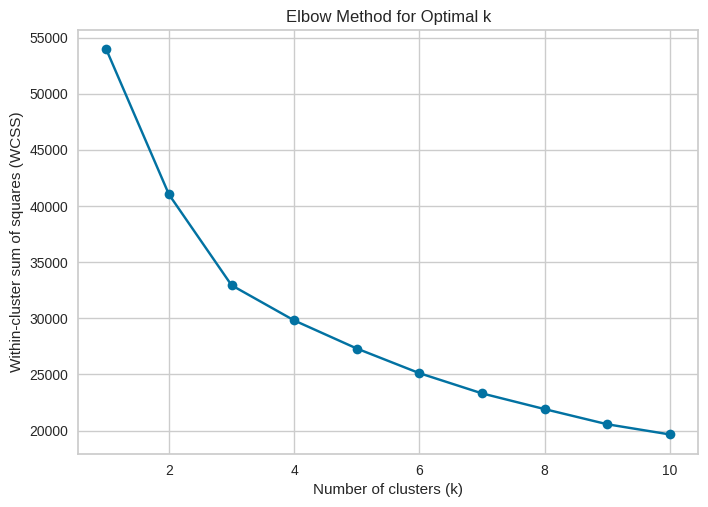

In [ ]:
wcss = []


for k in range(1, 11):


    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_data_pca)

    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the range of k values
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
def kmeans_clustering(df, k):

    kmeans = KMeans(n_clusters=k, random_state=0)


    cluster_labels = kmeans.fit_predict(df)

    # Compute silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)

    # Compute Davies-Bouldin score
    db_score = davies_bouldin_score(df, cluster_labels)

    # Compute Calinski-Harabasz score
    ch_score = calinski_harabasz_score(df, cluster_labels)


    inertia = kmeans.inertia_

    return cluster_labels, silhouette_avg, db_score, ch_score, inertia

cluster_labels, silhouette_avg, db_score, ch_score, inertia = kmeans_clustering(customer_data_pca, 3)


print("Performance measures for k=3:")
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Score:", db_score)
print("Calinski-Harabasz Score:", ch_score)
print("Inertia:", inertia)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Performance measures for k=3:
Silhouette Score: 0.23812055390790549
Davies-Bouldin Score: 1.3349712826577
Calinski-Harabasz Score: 1291.068058288821
Inertia: 32937.29881119738


In [ ]:
customer_data_pca

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12347.0,3.417742,-1.347816,1.134397,1.708350,-0.570142,-0.038815
12348.0,1.130880,0.591307,0.660540,1.246546,-1.148740,-0.750812
12349.0,2.548642,-2.851382,6.453147,-1.320732,1.335417,0.031448
12350.0,-1.913125,-0.590857,0.763310,-0.760160,-1.298112,0.099241
12352.0,3.377813,-1.536748,-1.797159,-2.259588,-0.123092,-0.290063
...,...,...,...,...,...,...
18280.0,-2.172625,-2.711335,0.043561,-0.626442,0.541752,-0.144511
18281.0,-2.436713,3.301309,-0.398936,-0.434406,0.756074,-0.033821
18282.0,-1.464864,1.369006,-1.395387,0.167291,0.536373,0.056979


In [ ]:

customer_data_reset_index = customer_data.reset_index()

# Perform K-means clustering for k=3
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(customer_data_pca)

customer_data_pca_with_labels = customer_data_pca.copy()
customer_data_pca_with_labels['Cluster'] = cluster_labels

final_data = pd.merge(customer_data_reset_index, customer_data_pca_with_labels['Cluster'], on='CustomerID')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
final_data.head(3)

,index,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster
0,0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,0
1,1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,0,0.0,449.31,301.159918,-160.884,2
2,2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,0,0.0,1757.55,0.0,0.0,0


In [ ]:
final_data.columns

Index(['index', 'CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
       'Spending_Trend', 'Cluster'],
      dtype='object')

In [ ]:
# Create separate dataframes for each cluster
cluster_0 = final_data[final_data['Cluster'] == 0]
cluster_1 = final_data[final_data['Cluster'] == 1]
cluster_2 = final_data[final_data['Cluster'] == 2]


In [ ]:
cluster_0  #casual weekend spenders

,index,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster
0,0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,0
2,2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,0,0.0,1757.55,0.0,0.0,0
4,4,12352.0,36,8,536,2506.04,313.255,59,3.095238,1,14,0,3,3.0,626.51,453.171921,-58.712,0
9,9,12360.0,52,3,1165,2662.06,887.353333,105,1.15625,1,15,0,0,0.0,887.353333,306.054391,-19.9,0
15,15,12370.0,51,4,2352,3541.94,885.485,143,1.872727,1,12,0,0,0.0,1180.646667,600.34727,-562.495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4034,18259.0,24,3,714,2338.6,779.533333,27,8.341463,3,14,1,0,0.0,779.533333,360.43502,347.05,0
4035,4035,18260.0,172,6,1475,2628.35,438.058333,86,1.409091,2,10,1,2,2.0,438.058333,115.542995,14.643714,0
4042,4042,18272.0,2,6,2050,3078.58,513.096667,99,1.478788,3,12,1,1,0.166667,615.716,261.22545,-137.473,0
4051,4051,18283.0,3,16,1357,2045.53,127.845625,263,0.463889,3,14,1,0,0.0,204.553,165.490044,22.332909,0


In [ ]:
cluster_1#

,index,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster
3,3,12350.0,310,1,197,334.4,334.4,17,0.0,2,16,0,0,0.0,334.4,0.0,0.0,1
7,7,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0,1
8,8,12358.0,1,2,248,1168.06,584.03,13,8.277778,1,10,0,0,0.0,584.03,140.247559,198.34,1
11,11,12363.0,109,2,408,552.0,276.0,23,6.045455,0,13,0,0,0.0,276.0,32.668333,-46.2,1
13,13,12365.0,291,2,174,641.38,320.69,22,0.0,0,13,0,1,0.25,641.38,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,4043,18273.0,2,3,80,204.0,68.0,1,127.5,0,11,1,0,0.0,68.0,29.444864,0.0,1
4044,4044,18274.0,30,1,88,175.92,175.92,11,0.0,2,17,1,1,0.166667,175.92,0.0,0.0,1
4046,4046,18277.0,58,1,68,110.38,110.38,8,0.0,2,15,1,1,1.0,110.38,0.0,0.0,1
4047,4047,18278.0,73,1,66,173.9,173.9,9,0.0,1,11,1,0,0.0,173.9,0.0,0.0,1


In [ ]:
cluster_2 #

,index,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Cluster
1,1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,0,0.0,449.31,301.159918,-160.884,2
5,5,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0,0.0,2
6,6,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0,0.0,2
10,10,12361.0,287,1,91,189.9,189.9,10,0.0,4,13,0,0,0.0,189.9,0.0,0.0,2
12,12,12364.0,7,4,1506,1313.1,328.275,70,1.25,4,15,0,0,0.0,328.275,223.846443,-72.154,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,4037,18262.0,140,1,182,149.48,149.48,13,0.0,4,16,1,0,0.0,149.48,0.0,0.0,2
4038,4038,18263.0,25,3,1468,1213.16,404.386667,59,3.783333,3,10,1,1,0.05,404.386667,98.12637,47.08,2
4045,4045,18276.0,43,1,186,335.86,335.86,14,0.0,3,10,1,2,0.333333,335.86,0.0,0.0,2
4049,4049,18281.0,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0,2


In [ ]:
col_names =['Days_Since_Last_Purchase', 'Total_Transactions',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Transaction_Value',
       'Unique_Products_Purchased', 'Average_Days_Between_Purchases',
       'Day_Of_Week', 'Hour', 'Is_UK', 'Cancellation_Frequency',
       'Cancellation_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std',
       'Spending_Trend']

In [ ]:

def create_scatter_plot(data, x_col, y_col, hue_col, palette):
    ax = sns.scatterplot(x=x_col, y=y_col, hue=hue_col, data=data, palette=palette)
    ax.spines['bottom'].set_color('blue')
    ax.spines['left'].set_color('blue')
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')
    return ax

palette1 = ["red", "green", "black"]


plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for idx, col in enumerate(col_names):
    plt.subplot(4, 4, idx + 1)
    create_scatter_plot(final_data, x_col=col, y_col='CustomerID', hue_col='Cluster', palette=palette1)

plt.show()


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

In [ ]:

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
final_data['CustomerID'] = final_data['CustomerID'].astype('float')

In [ ]:

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(final_data[['CustomerID', 'Cluster']], on='CustomerID', how='inner')
merged_data

In [ ]:
# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['Cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

In [ ]:
# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity'].sum().reset_index()

In [ ]:
# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = final_data[final_data['Cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['Cluster'] == cluster)]['StockCode'].tolist()

        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)

        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'Cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = final_data.merge(recommendations_df, on=['CustomerID', 'Cluster'], how='right')

In [ ]:
customer_data_with_recommendations